# Week 4 Lab: MNIST - Handwritten digits database

## Overview

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. MNIST is like the "Hello World" of machine learning with which you can try out a few machine learning algorithms.

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [6]:
# Import dataset
# Your code here
data = pd.read_csv("./data/train.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
# For easy to handle, we use a small piece of dataset
# Ramdomly choose 5000 rows for now
# hint: dataframe.sample(5000)
# Your code here
data = data.sample(5000)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 296 to 30348
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 30.0 MB


In [8]:
# Let's take a look at first 5 rows ()
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
296,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14632,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30399,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23528,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40283,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


You can see that each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

Visually, if we omit the "pixel" prefix, the pixels make up the image like this:
```
000 001 002 003 ... 026 027
028 029 030 031 ... 054 055
056 057 058 059 ... 082 083
 |   |   |   |  ...  |   |
728 729 730 731 ... 754 755
756 757 758 759 ... 782 783 
```

In [12]:
# Let's list all unique values are there in 'label'
# We expect to see a list from 0 to 9
np.sort(data['label'].unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [67]:
# Let's defines X and y for train_test_split 
# y should be values of the column 'label' and X should contain the rest (784 pixel columns)
y = data['label'].values
X = data.iloc[:, 1:].values


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [68]:
# Train test split
# Let's split X and y to X_train, y_train, X_test, y_test with 25% test size and random state 101
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)




Label: 1


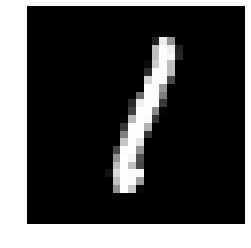

In [69]:
# Now let's convert some example of our data back to image
# Let's start with choosing a random integer number called 'index', your choice but it shouldn't be greater than 5000
# Let's print out y_train[index] which is the number of the image
# Using plt.imshow(img, cmap='gray') we can plot the image. But img here should be 28x28 in height and width.
# So before plotting we need to transform the vector X_train[index] into 28x28 Matrix with the function reshape()
# Here is an example:
# a = np.arange(6).reshape((3, 2))
# >>> a
# array([[0, 1],
#        [2, 3],
#        [4, 5]])
# Now we try to look at the number with index is 36, you can try with different index for exp: 30, 49
index = 96
print("Label: " + str(y_train[index]))
plt.imshow(X_train[index].reshape((28,28)),cmap='gray')
plt.axis('off')
plt.show()

In [70]:
# Random Forest & Decision Tree
# Let's define two classifier called rfc and dtc represent RandomForestClassifier and DecisionTreeClassifier
# Your code here

rfc = RandomForestClassifier()
dtc = DecisionTreeClassifier()

In [71]:
# Let's fit training data to Random Forest Classifier
rfc.fit(X_train, y_train)

/Users/longnguyen/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [72]:
# Let's fit training data to Decision Tree Classifier
dtc.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [73]:
# Let's apply our models to testing set and take a look at accuracy score first
# Random Forest model
predictionsR = rfc.predict(X_test)
accuracy_score(y_test,predictionsR)


0.8784

In [74]:
# Decision Tree model
predictionsD = dtc.predict(X_test)
accuracy_score(y_test,predictionsD)



0.7584

array([[111,   0,   1,   1,   0,   2,   1,   0,   0,   0],
       [  0, 120,   1,   1,   0,   0,   1,   0,   0,   0],
       [  1,   1, 117,   3,   0,   0,   4,   2,   3,   1],
       [  0,   1,   6, 102,   2,   9,   0,   2,   2,   2],
       [  0,   1,   2,   0, 107,   0,   2,   1,   0,   3],
       [  3,   4,   3,   6,   2,  88,   1,   2,   2,   0],
       [  0,   1,   4,   0,   1,   0, 127,   0,   2,   0],
       [  0,   2,   1,   1,   5,   0,   0, 122,   0,   5],
       [  2,   2,   5,   5,   1,   5,   0,   1, 107,   2],
       [  2,   1,   2,   5,   6,   0,   1,   8,   3,  97]])

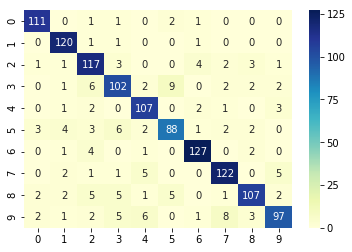

In [75]:
# Remember seaborn with its amazing heatmap()? 
# Actually we can use heatmap() to visualize the confustion matrix
# Just for example about the style of heatmap: cmap="YlGnBu", annot=True, fmt="d"

# Let's plot the heatmap for confusion matrix of Random Forest model
sns.heatmap(confusion_matrix(y_test, predictionsR),cmap="YlGnBu", annot=True, fmt="d")

confusion_matrix(y_test, predictionsR)

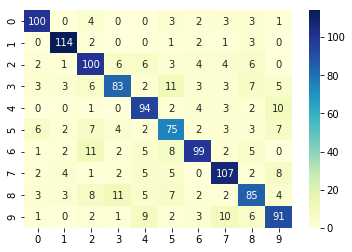

In [76]:
# And heatmap for confusion matrix of Decision Tree model
sns.heatmap(confusion_matrix(y_test, predictionsD),cmap="YlGnBu", annot=True, fmt="d")




[0.6664, 0.8128, 0.872, 0.904, 0.9336, 0.932, 0.9368, 0.9392]


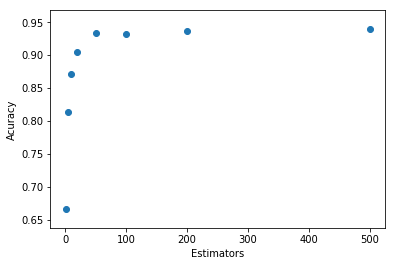

In [81]:
# Base on the accuracy score we decide to take Random Forest as our Classifier and we're going to improve it
# Now let's take a look at the parameter 'n_estimators' which is the number of trees in the forest
# Do you think the more tree we have the better our model will be?

# Let's plot the correlation between n_estimators and accuracy
# Define an array of number called 'n', n should be set of 'n_estimators' that we're going to test
n = [1 ,5 ,10, 20, 50, 100, 200, 500]
# Define a 'result' array to save the accuracy score of each trial
result = []
# Using a for-loop which goes through n
# Inside the loop we will define a new RandomForestClassifier model with appropriate 'n_estimators'
# Then apply that model on X_test and calculate the accuracy score then save it into 'result'
# Your code here
for i in n:
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    result.append(accuracy_score(y_test, predictions))    
# Last step let's plot n and result on a grid using plt.scatter()
plt.scatter(n, result)
plt.xlabel('Estimators')
plt.ylabel('Acuracy')
print(result)

## Great job!